# Artificial Neural Networks (ANN): Logistic Regression (LR) & Multi-Layer Perceptron (MLP)
---
**Collaborators:** Amy Zhang (lead), ChatGPT, Perplexity AI, Gemini AI  
**Date:** June 2025

---

## Overview

This notebook implements two ANN architectures to classify daily weather records from the **OSLO weather station (1960–2022)** using six meteorological features:

- Precipitation  
- Global Radiation  
- Sunshine Duration  
- Temperature Min / Mean / Max  

---

## Model Architectures 🤖

### Logistic Regression (LR-ANN)

- Single-layer perceptron with sigmoid activation  
- Outputs probability between 0 and 1  
- Ideal for binary classification  
- *(Note: Despite the name, it’s a classification model, not regression)*

### Multi-Layer Perceptron (MLP-ANN)

- Feedforward neural network with two hidden layers (12 and 8 neurons)  
- Uses ReLU activations  
- Trained with backpropagation and optimized by **Adam** optimizer  

---

## Training Details

- Loss function: **Binary Cross-Entropy** (suited for binary classification with sigmoid output)  
- Differs from linear regression, which typically uses Mean Squared Error (MSE)

---

## Objectives ✅

- Preprocess OSLO weather data  
- Build and train LR and MLP models using TensorFlow/Keras  
- Evaluate model performance via:  
  - Accuracy  
  - Confusion Matrix  
  - Learning Curves  
- Compare LR vs. MLP on:  
  - Model capacity  
  - Overfitting risk  
  - Predictive performance  


#### 📝 Learning Note – MSE vs Binary Cross-Entropy

| Loss Function            | Use Case                        | Formula (Simplified)                   | Notes |
|--------------------------|----------------------------------|----------------------------------------|-------|
| **MSE** (Mean Squared Error) | Regression problems              | (1/n) * Σ(y_true - y_pred)²            | Penalizes large errors heavily. Not ideal for classification. |
| **Binary Cross-Entropy**     | Binary classification (0 or 1)   | -[y·log(p) + (1−y)·log(1−p)]            | Encourages confident, correct predictions. Best with sigmoid output. |

🧪 **Key difference:** MSE assumes outputs are continuous, while BCE assumes probabilistic outputs. For **classification**, BCE usually yields better gradients.

</details>


# 📦 1. Import Libraries & Datasets

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# TensorFlow/Keras for building ANN models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Visualization
import matplotlib.pyplot as plt

# 🔒 Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
weather_df = pd.read_csv('Dataset-weather-prediction-dataset-processed.csv')

In [ ]:
pleasant_weather = pd.read_csv('Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# 🧹2. Data Selection and Cleaning

- Select relevant features
- Extract X and y
- Handle missing data (drop NaNs)

*Note: Scaling is **not** performed here yet — it will be done after splitting the dataset to avoid data leakage.*

In [ ]:
# Select relevant OSLO features
oslo_features = ['OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
                 'OSLO_temp_max', 'OSLO_temp_mean', 'OSLO_temp_min']

# Extract X and y
X = weather_df[oslo_features].copy()
y = pleasant_weather['OSLO_pleasant_weather'].copy()

# Drop rows with missing values (optional but safe)
X.dropna(inplace=True)
y = y.loc[X.index]  # Align y to cleaned X


# 📊 3. Train/Test Split & Scaling
- Split data into training and testing sets
- Fit scaler on training data and transform both train and test sets

In [ ]:
# 1. Split *unscaled* data first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Fit scaler ONLY on the training data
### fit_transform()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform the test data using the same scaler
### transform()
X_test_scaled = scaler.transform(X_test)

#### ⚠️ Applying fit_transform() to the test set too lets the model "peek"  at the test distribution — data leakage!


| Method            | What it does                                                               | When to use it                          |
| ----------------- | -------------------------------------------------------------------------- | --------------------------------------- |
| `fit_transform()` | Learns **how** to scale (i.e. computes mean & std) **and** applies scaling | Use **once**, on **training data only** |
| `transform()`     | Just applies the scaling, using the already-learned mean & std             | Use on **test or new data** only        |


# 🛠️ 3. Model Building and Training
- Build and train Logistic Regression ANN
- Build and train MLP ANN



## 1️⃣ Logistic Regression ANN

Simplest form of an ANN, often called a Single-Layer Perceptron. It consists of a single neuron in the output layer, where a sigmoid activation function is applied to the weighted sum of inputs (plus a bias). The output is a probability between 0 and 1.


### ⚙️ a) Run (LR-ANN)

In [ ]:
# Define model: Single neuron with sigmoid activation
lr_model = Sequential([
    Dense(1, input_shape=(X_train_scaled.shape[1],), activation='sigmoid')
])

# Compile the model
lr_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
lr_history = lr_model.fit(
    X_train_scaled, y_train,      # <–– do NOT scale y; binary
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5058 - loss: 0.8178 - val_accuracy: 0.7533 - val_loss: 0.5240
Epoch 2/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4753 - val_accuracy: 0.8385 - val_loss: 0.3956
Epoch 3/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8533 - loss: 0.3666 - val_accuracy: 0.8829 - val_loss: 0.3267
Epoch 4/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8913 - loss: 0.3057 - val_accuracy: 0.9063 - val_loss: 0.2836
Epoch 5/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9120 - loss: 0.2670 - val_accuracy: 0.9199 - val_loss: 0.2544
Epoch 6/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9226 - loss: 0.2404 - val_accuracy: 0.9265 - val_loss: 0.2333
Epoch 7/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.2211 - val_accuracy: 0.9276 - val_loss: 0.2173
Epoch 8/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2063 - val_accuracy: 0.

### 🧮 b) Final LR-ANN Accuracy: 0.9512

#### 🧐 Evaluation notes — Logistic Regression ANN

By epoch 50, the model predicted the correct outcome for 95.12% of previously unseen examples — a strong performance.

The final loss value of 0.1207 (with 0.0 being perfect) indicates that the model made mostly confident and correct predictions, with minimal penalty from wrong or uncertain ones.

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = lr_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")



✅ Test Accuracy: 0.9512
📉 Test Loss: 0.1207


#### 👀 Training & Validation Accuracy and Loss Curves Observations (LR-ANN)

**Left Plot – Accuracy (Train vs. Val)**

- The LR-ANN quickly converges to ~95% accuracy by epoch 10 for both training and validation.

- There's virtually no gap between training and validation accuracy; the two lines track closely. This indicates that the model is not just memorizing the training data; it's learning general patterns that apply well to unseen data, a sign of good generalization.

**Right Plot – Loss (Train vs. Val)**

- Smooth downward curves that flatten by epoch 20–30, converging to ~0.12 loss.

- Nearly identical training and validation loss curve. Again, this is an indicator of *no overfitting*, stable learning.

**👉 TL;DR**: LR-ANN’s final accuracy of ~95%, along with the near-identical tracking of training and validation accuracy, suggests solid generalization and stable learning. While performance may be capped by the model’s simplicity, it handles the task remarkably well given its shallow architecture.

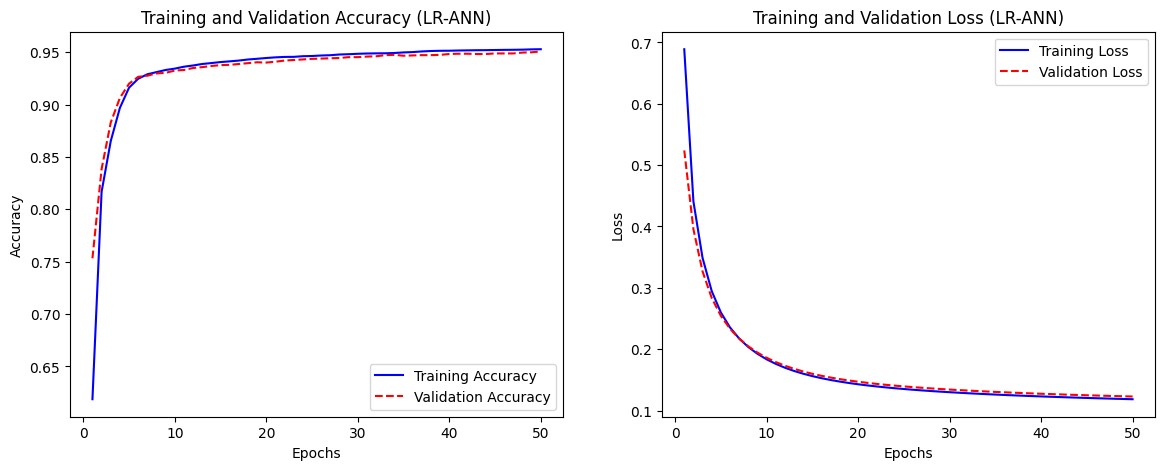

In [ ]:
### Plot Training & Validation Accuracy and Loss Curves

# Extract accuracy and loss for train & validation sets
acc = lr_history.history['accuracy']
val_acc = lr_history.history['val_accuracy']
loss = lr_history.history['loss']
val_loss = lr_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (LR-ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training and Validation Loss (LR-ANN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### 📝 Learning Note — Effect of Correcting Split/Scale Sequence (re: Confusion Matrix)

Although both runs of the LR-ANN model achieved nearly identical overall performance (≈95% accuracy on unseen data), correcting the order of data splitting and scaling led to a subtle but meaningful shift in predictions:

**Original (data leakage)**

→ 97.3% (3771) True Unpleasant, 83.4% (597) True Pleasant

**Corrected (split before scale)**

→ 97.4% (3775) True Unpleasant, 82.5% (591) True Pleasant

🔍 **Interpretation**:
The corrected model, trained on a cleaner and more realistic training/test split, slightly improved recognition of the Unpleasant class but became a bit more conservative on Pleasant predictions. This small shift highlights how data leakage — even when subtle — can affect not just total accuracy, but class balance and generalization behavior.

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


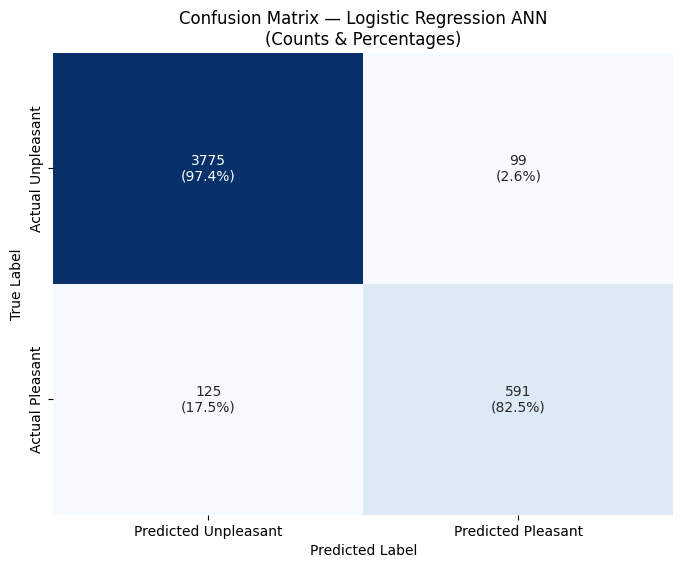

In [ ]:
### Confusion Matrix

import seaborn as sns

# Generate predictions
lr_y_pred_prob = lr_model.predict(X_test_scaled)
lr_y_pred = (lr_y_pred_prob > 0.5).astype("int32").flatten()

# Create confusion matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm_sum = np.sum(lr_cm)
lr_cm_percent = lr_cm / lr_cm.sum(axis=1, keepdims=True) * 100

# Build annotation labels: "count\n(percentage%)"
labels = np.array([[f"{count}\n({percent:.1f}%)"
                    for count, percent in zip(row_counts, row_percents)]
                   for row_counts, row_percents in zip(lr_cm, lr_cm_percent)])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Predicted Unpleasant', 'Predicted Pleasant'],
            yticklabels=['Actual Unpleasant', 'Actual Pleasant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression ANN\n(Counts & Percentages)")
plt.show()



#### 📈 Final Report

| Metric        | Unpleasant (3874 samples)                                                    | Pleasant (716 samples)                                                  |
| ------------- | ---------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Precision** | 0.97 → Of all days predicted as *Unpleasant*, 97% were actually unpleasant.  | 0.86 → Of all days predicted as *Pleasant*, 86% were actually pleasant. |
| **Recall**    | 0.97 → Of all *unpleasant* days, LR-ANN model correctly identified 97%.        | 0.83 → Of all *pleasant* days, LR-ANN correctly identified 83%.     |
| **F1-score**  | 0.97 → The harmonic mean of precision & recall, showing balance (very high). | 0.85 → Pretty good balance, but not as perfect as unpleasant class.     |
| **Support**   | 3874 → Number of actual unpleasant days in the test set.                     | 716 → Number of actual pleasant days in the test set.                   |

#### 🔍 Insights (beyond 'accuracy'):
- Even though accuracy looks great, the model performs better on 'Unpleasant' than 'Pleasant'.
- LR-ANN predicted 97% of unpleasants right (the majority class), **BUT** only 83–86% on pleasant (the minority class),

This imbalance can be masked by high overall accuracy; LR-ANN may need class balancing or tuning to improve on “Pleasant” predictions (e.g. via class weights, oversampling, etc).


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined

print(classification_report(y_test, lr_y_pred, target_names=['Unpleasant', 'Pleasant']))


              precision    recall  f1-score   support

  Unpleasant       0.97      0.97      0.97      3874
    Pleasant       0.86      0.83      0.84       716

    accuracy                           0.95      4590
   macro avg       0.91      0.90      0.91      4590
weighted avg       0.95      0.95      0.95      4590



## 2️⃣ Multi-Layer Perception ANN

The MLP-ANN (Multi-Layer Perceptron Artificial Neural Network) is a deeper neural network that includes hidden layers, unlike the simpler LR-ANN which consists of only an input and output layer (a single neuron).

In the MLP-ANN, input features are passed through one or more hidden layers, each applying a nonlinear activation function (like ReLU) to capture more complex patterns in the data. The model is trained using backpropagation, and weights are updated via the Adam optimizer.

At the output layer, a sigmoid activation function is applied to convert the final signal into a probability between 0 and 1, making it suitable for binary classification.










#### ⚙️ a) Run (MLP-ANN)

In [ ]:
# Define the MLP model
mlp_model = Sequential([
    Dense(12, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
mlp_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
mlp_history = mlp_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9040 - loss: 0.3434 - val_accuracy: 0.9300 - val_loss: 0.1682
Epoch 2/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9357 - loss: 0.1475 - val_accuracy: 0.9423 - val_loss: 0.1334
Epoch 3/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9482 - loss: 0.1192 - val_accuracy: 0.9537 - val_loss: 0.1132
Epoch 4/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1018 - val_accuracy: 0.9594 - val_loss: 0.1005
Epoch 5/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.0904 - val_accuracy: 0.9654 - val_loss: 0.0919
Epoch 6/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9691 - loss: 0.0826 - val_accuracy: 0.9668 - val_loss: 0.0852
Epoch 7/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.0767 - val_accuracy: 0.9706 - val_loss: 0.0800
Epoch 8/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9737 - loss: 0.0723 - val_accuracy: 0.9728 - val_

### 🧮 b) Final MLP-ANN Accuracy: 0.9943

#### 🧐 Evaluation notes -- Multi-Layer Perceptron ANN

By Epoch 50, the MLP-ANN correctly predicted 99% of the outcomes on the test data—an extremely high performance, indicating strong generalization to unseen examples. The loss of 0.02, even closer to the ideal 0.0 than that of the LR-ANN, suggests the model made highly confident and mostly correct predictions.

In [ ]:
### Evaluate on Test Data
test_loss, test_accuracy = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")



✅ Test Accuracy: 0.9943
📉 Test Loss: 0.0221


#### 👀 Training & Validation Accuracy and Loss Curves Observations (MLP-ANN)

**Left Plot – Accuracy (Train vs. Val)**

- Higher final accuracy than LR (~99.3%), but **a consistent gap** between training and validation accuracy until around epoch 40.

- This indicates the MLP is fitting the training data better, but struggling more with generalization early on.

- By epoch 50, validation accuracy slightly surpasses training, which is rare but not impossible. Possible reasons:

  - Random fluctuations / regularization working well

  - Slight drop in training accuracy due to stochasticity

  - Validation set happens to be easier near the end of training

**Right Plot – Loss (Train vs. Val)**

- Steeper loss descent compared to LR (starts higher, ends lower ~0.04–0.05).

- The training loss is consistently lower than validation loss until near the end, hinting at some overfitting.

**👉 TL;DR**: MLP-ANN’s final accuracy of ~99% shows a clear performance gain over LR-ANN’s 95%, likely thanks to its deeper architecture and increased capacity to learn complex patterns. While some signs of early overfitting appeared, the model ultimately generalized very well to unseen data.

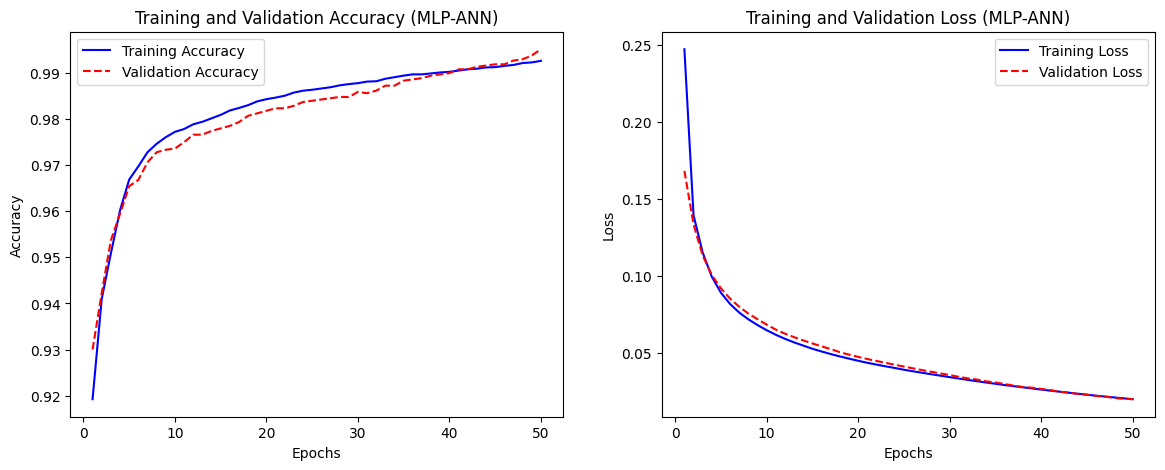

In [ ]:
### Plot Training & Validation Accuracy and Loss Curves

# Extract accuracy and loss for train & validation sets
acc = mlp_history.history['accuracy']
val_acc = mlp_history.history['val_accuracy']
loss = mlp_history.history['loss']
val_loss = mlp_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (MLP-ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training and Validation Loss (MLP-ANN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### 📈 Final Report

| **Metric**    | **Unpleasant** (3874 samples)                                                        | **Pleasant** (716 samples)                                                  |
| ------------- | ------------------------------------------------------------------------------------ | --------------------------------------------------------------------------- |
| **Precision** | **1.00** → Of all days predicted as *Unpleasant*, 100% were actually unpleasant.     | **0.98** → Of all days predicted as *Pleasant*, 98% were actually pleasant. |
| **Recall**    | **1.00** → Of all *Unpleasant* days in the test set, 100% were correctly identified. | **0.99** → Of all *Pleasant* days, 99% were correctly identified.           |
| **F1-score**  | **1.00** → Perfect harmonic mean of precision & recall—very strong model behavior.   | **0.98** → Also very high, indicating excellent balance in predictions.     |
| **Support**   | 3874 → Number of actual *Unpleasant* days in the test set.                           | 716 → Number of actual *Pleasant* days in the test set.                     |

#### 💡 Insight Beyond Accuracy:
That unusual moment around Epoch 40—where validation accuracy slightly surpasses training accuracy—likely reflects the model performing exceptionally well on the specific composition of the test set. In particular:
- The model correctly predicted 707/716 Pleasant days—99% recall—which contributes to the spike in validation performance. This is unusually high recall for the minority class (Pleasant), and it’s possible that:
  - The validation set ended up slightly easier (class distribution or feature mix),
  - Or regularization techniques helped reduce overfitting at the right moment.

**Takeaway**: This moment of "val > train" accuracy is not an error, so much as a sign that the model generalized particularly well on the test batch it saw.

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


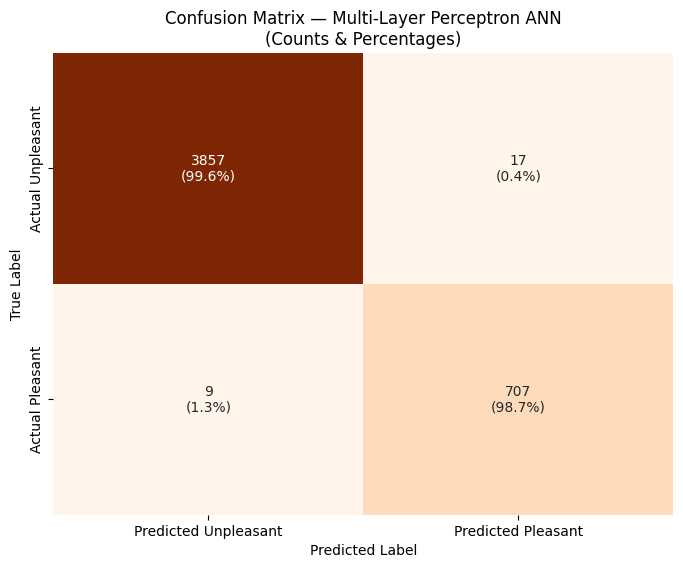

              precision    recall  f1-score   support

  Unpleasant       1.00      1.00      1.00      3874
    Pleasant       0.98      0.99      0.98       716

    accuracy                           0.99      4590
   macro avg       0.99      0.99      0.99      4590
weighted avg       0.99      0.99      0.99      4590



In [ ]:
### Confusion Matrix & Classification Report

# Generate predictions for MLP
mlp_y_pred_prob = mlp_model.predict(X_test_scaled)
mlp_y_pred = (mlp_y_pred_prob > 0.5).astype("int32").flatten()

# Create confusion matrix for MLP
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
mlp_cm_sum = np.sum(mlp_cm)
mlp_cm_percent = mlp_cm / mlp_cm.sum(axis=1, keepdims=True) * 100

# Build annotation labels: "count\n(percentage%)"
mlp_labels = np.array([[f"{count}\n({percent:.1f}%)"
                       for count, percent in zip(row_counts, row_percents)]
                      for row_counts, row_percents in zip(mlp_cm, mlp_cm_percent)])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=mlp_labels, fmt='', cmap='Oranges', cbar=False,
            xticklabels=['Predicted Unpleasant', 'Predicted Pleasant'],
            yticklabels=['Actual Unpleasant', 'Actual Pleasant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Multi-Layer Perceptron ANN\n(Counts & Percentages)")
plt.show()


# Classification Report
print(classification_report(y_test, mlp_y_pred, target_names=['Unpleasant', 'Pleasant']))


### 🖼️ Additional Visualizations for Comparison

#### 🔎 Validation Accuracy: MLP-ANN vs. LR-ANN (Oslo)
This plot compares validation accuracy over epochs for both models:

- MLP-ANN starts higher and stays higher, with a validation accuracy that climbs steadily toward ~99.6%.

- Thanks to its deeper architecture and hidden layers, MLP-ANN can learn more complex patterns and feature interactions, giving it an early and consistent lead.

- LR-ANN improves quickly in the first few epochs, then levels off around 94.5%.

- Its simpler structure (single neuron output, no hidden layers) lets it converge fast—but also limits its capacity to model more nuanced decision boundaries.

Both models show similar learning trajectories (curved upward), but **MLP's trajectory is simply elevated throughout—a sign of more powerful representation**.

**👉TL;DR**: MLP-ANN outperforms LR-ANN by leveraging its deeper architecture to capture more complex feature interactions, enabling better generalization to unseen data.

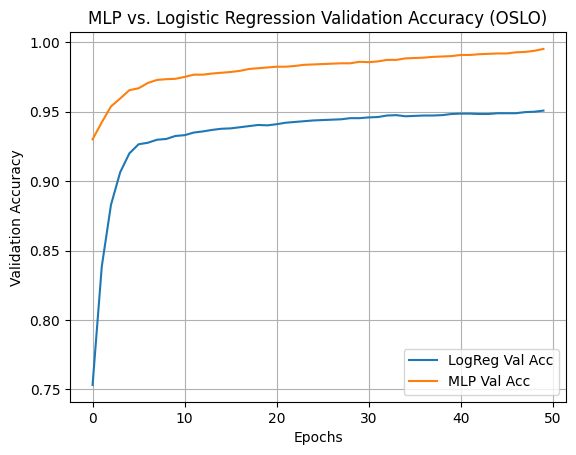

In [ ]:
plt.plot(lr_history.history['val_accuracy'], label='LogReg Val Acc')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title("MLP vs. Logistic Regression Validation Accuracy (OSLO)")
plt.grid(True)
plt.show()


#### 🔎 Confusion Matrices: MLP-ANN vs. LR-ANN (Oslo)

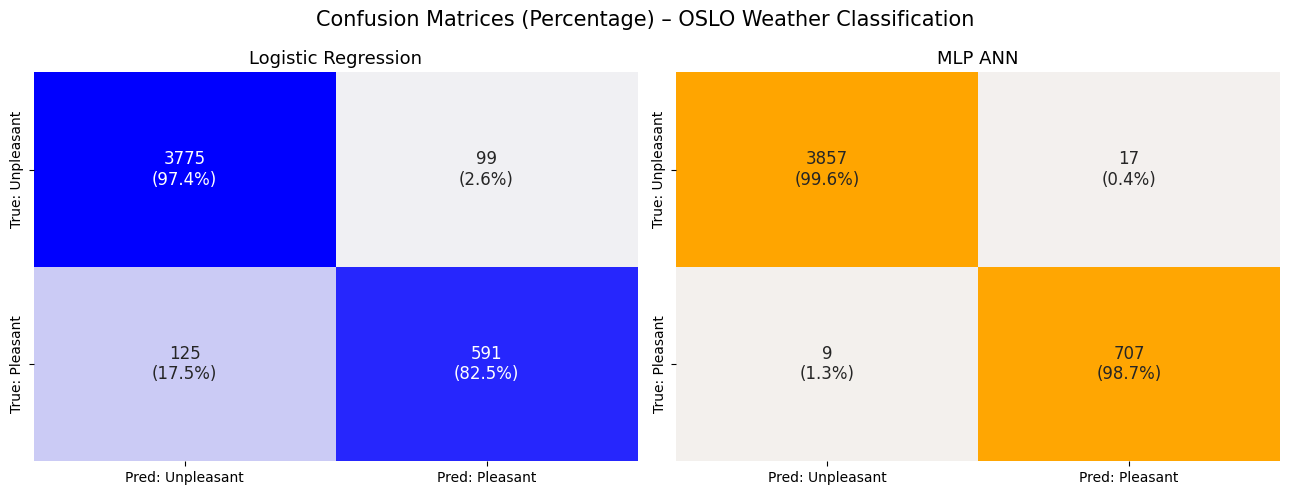

In [ ]:
import numpy as np

def plot_confusion_matrix_percent(cm, title, ax, cmap):
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create annotation labels with count and percentage
    labels = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            labels[i, j] = f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)"

    sns.heatmap(cm_percent, annot=labels, fmt='', cmap=cmap, cbar=False,
                xticklabels=['Pred: Unpleasant', 'Pred: Pleasant'],
                yticklabels=['True: Unpleasant', 'True: Pleasant'],
                ax=ax, annot_kws={"size": 12})
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Get the confusion matrices (already done)
# cm_ann, cm_log

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
blue = sns.light_palette("orange", as_cmap=True)
salmon = sns.light_palette("blue", as_cmap=True)

# Plot Logistic Regression on the left (axes[0]), MLP ANN on the right (axes[1])
plot_confusion_matrix_percent(lr_cm, "Logistic Regression", axes[0], cmap=salmon)
plot_confusion_matrix_percent(mlp_cm, "MLP ANN", axes[1], cmap=blue)

plt.suptitle("Confusion Matrices (Percentage) – OSLO Weather Classification", fontsize=15)
plt.tight_layout()
plt.show()
